<a href="https://colab.research.google.com/github/Gabrielvss/filtering_emg_signal/blob/main/filter_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projetando um Filtro Digital
Projeto da Disciplina de Processamento Digital de Sinais do Departamento de Engenharia Biomédica da Universidade Federal do Rio Grande do Norte.


**Discente:** Gabriel Vinícius Souza da Silva

# Carregando o Dados

In [2]:
#importando Bibliotecas
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import scipy.io as sio
from scipy.signal import find_peaks
%matplotlib inline


In [3]:
#carregando o arquivo
sig_path = '/content/drive/MyDrive/2020.2/PDS/unidade 2/EMG_3.mat'
S=sio.loadmat(sig_path)
S

{'Fs': array([[4000]], dtype=uint16),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Mar 30 14:17:54 2021',
 '__version__': '1.0',
 'sig3': array([[-333.        , -342.55119004, -364.85623288, ...,   64.8562289 ,
           42.55119331,   82.99999747]])}

In [4]:
#tranformando em numpy array
sig = np.array(S['sig3'])
#frequencia de amostragem
fs = S['Fs'][0,0]
#tranformando o sinal de matriz pra vetor
sig= np.squeeze(sig)
#Tamanho do sinal
N = len(sig)


# 1. Análisando os Dados

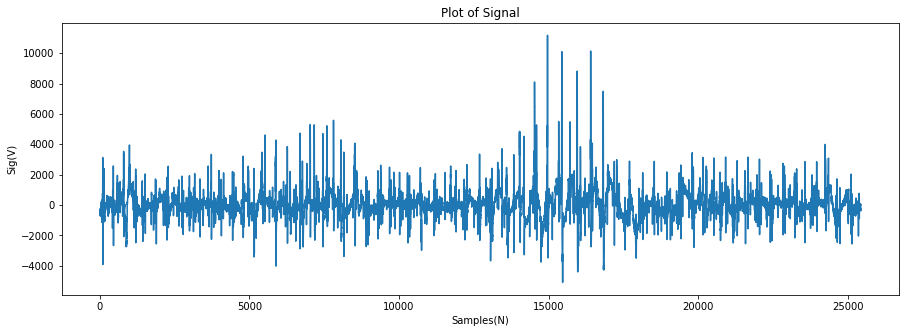

In [5]:
#Sinal em função das amostras 
fig=plt.figure(figsize=(15,5))
plt.title('Plot of Signal')
plt.xlabel('Samples(N)')
plt.ylabel('Sig(V)')
plt.plot(sig[0:int(N/2)]);

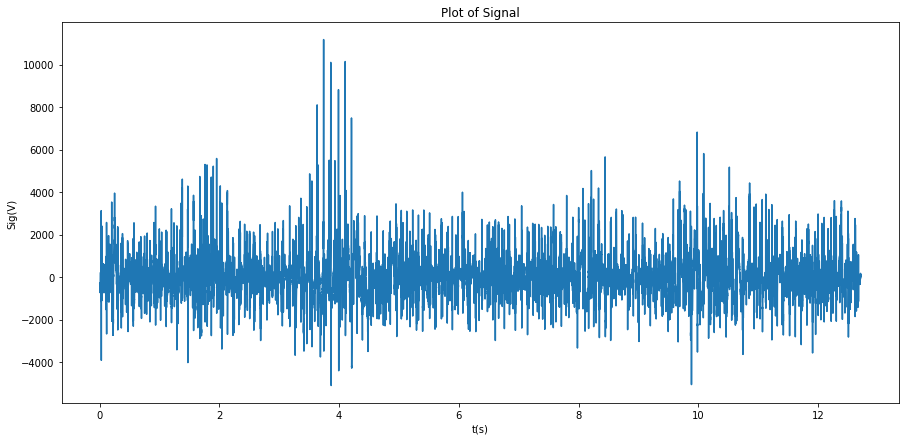

In [6]:
#Sinal em Função do Tempo
t = (np.linspace(0, (N-1),N))/fs

fig = plt.figure(figsize=(15,7))

plt.title('Plot of Signal')
plt.xlabel('t(s)')
plt.ylabel('Sig(V)')
lin1 = plt.plot(t, sig)

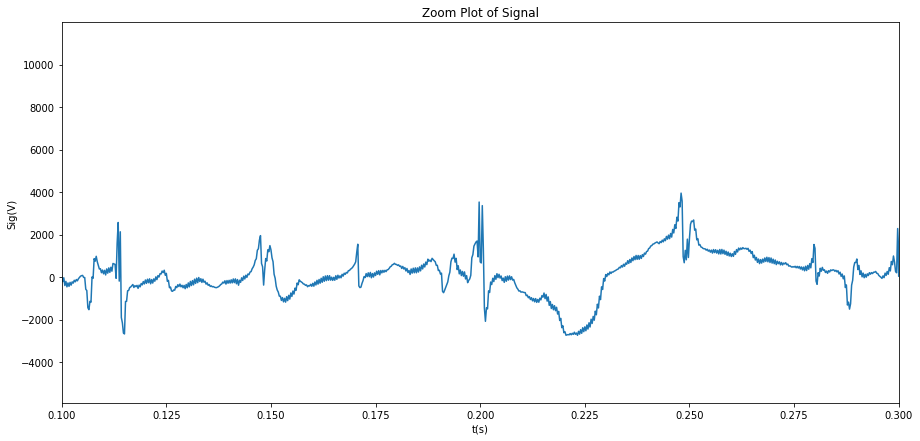

In [7]:
#visualizando o ruído
t = (np.linspace(0, (N-1),N))/fs

fig = plt.figure(figsize=(15,7))

plt.title('Zoom Plot of Signal')
plt.xlabel('t(s)')
plt.ylabel('Sig(V)')
plt.margins(x=0.025)
plt.xlim([0.1,0.3])
lin1 = plt.plot(t, sig)

## 1.1 Densidade Espectral
Foram utilizados dois metódos o de [welch](https://scipy.github.io/devdocs/generated/scipy.signal.welch.html) e o [Periodograma](https://scipy.github.io/devdocs/generated/scipy.signal.periodogram.html#scipy.signal.periodogram), ambos apresentam características parecidas, Com dois picos de frequência principais, conforme a o gráfico abaixo. 

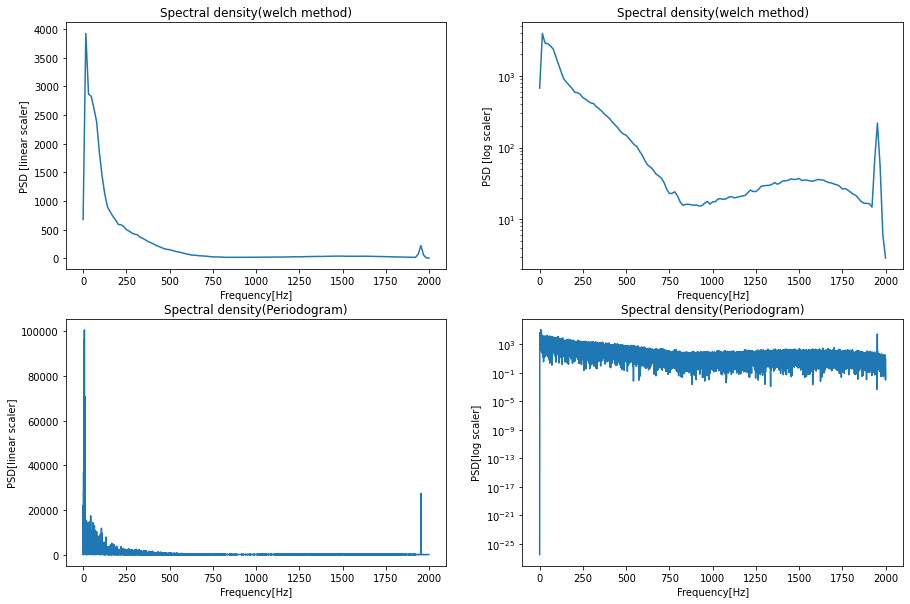

In [8]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

f_wel, Pxx_den_wel = signal.welch(sig, fs)
f_per, Pxx_den_per = signal.periodogram(sig, fs)

ax[0,0].set_title('Spectral density(welch method)')
ax[0,0].set_xlabel('Frequency[Hz]')
ax[0,0].set_ylabel('PSD [linear scaler]')
ax[0,0].plot(f_wel, Pxx_den_wel)

ax[0,1].set_title('Spectral density(welch method)')
ax[0,1].set_xlabel('Frequency[Hz]')
ax[0,1].set_ylabel('PSD [log scaler]')
ax[0,1].semilogy(f_wel, Pxx_den_wel)

ax[1,0].set_title('Spectral density(Periodogram)')
ax[1,0].set_xlabel('Frequency[Hz]')
ax[1,0].set_ylabel('PSD[linear scaler]')
ax[1,0].plot(f_per, Pxx_den_per)

ax[1,1].set_title('Spectral density(Periodogram)')
ax[1,1].set_xlabel('Frequency[Hz]')
ax[1,1].set_ylabel('PSD[log scaler]')
ax[1,1].semilogy(f_per, Pxx_den_per);


Nos gráficos acima há quatro Densidades espctrais ou power espctral density (PDS), as linhas representam os metódos (seção 1.2) utilizados e as colunas a escala de representação dos resultados (Linear ou logarítimica). A maior frquência do sinal é de 2000, como mostrado nos gráficos, e a frequência de amostragem foi de 4000 obedecendo a teoria da amostragem.

## 1.2 Analisando os espectros.
### Welch vs Periodograma

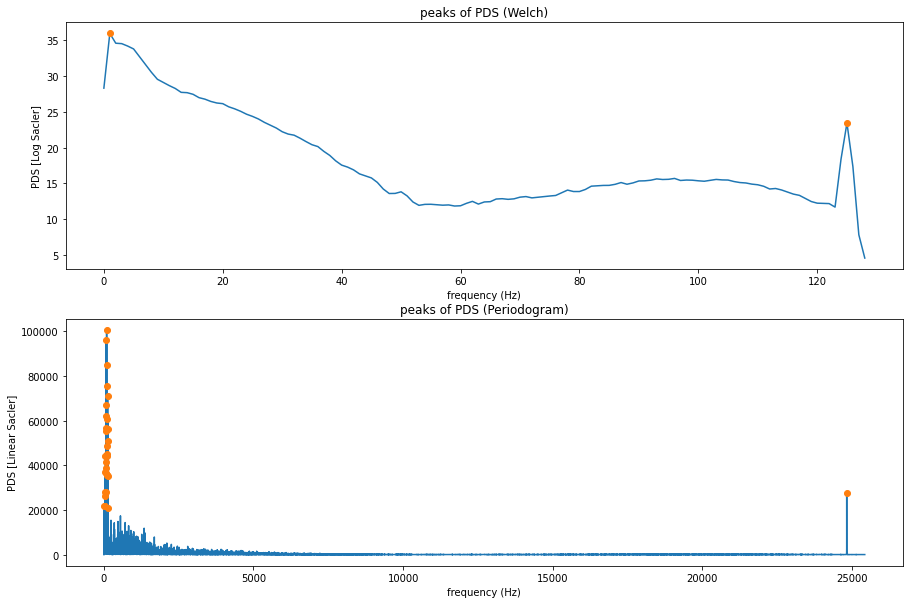

<Figure size 1080x504 with 0 Axes>

In [9]:
fig, ax = plt.subplots(2,1,figsize=(15,10))


y1 = 10*np.log10(Pxx_den_wel)
y2 = Pxx_den_per
peaks1, _ = find_peaks(y1,height=20)
peaks2, _ = find_peaks(y2,height=20000)

fig = plt.figure(figsize=(15,7))

ax[0].set_title(f'peaks of PDS (Welch)')
ax[0].set_xlabel('frequency (Hz)')
ax[0].set_ylabel('PDS [Log Sacler]')
ax[0].plot(y1)
ax[0].plot(peaks1,y1[peaks1], "o")


ax[1].set_title(f'peaks of PDS (Periodogram)')
ax[1].set_xlabel('frequency (Hz)')
ax[1].set_ylabel('PDS [Linear Sacler]')
ax[1].plot(y2)
ax[1].plot(peaks2,y2[peaks2], "o");

Como é possível  notar para o periodograma existem muito mais picos devido a maior resolução desse metódo que encontra muito mais frequências no sinal, essa característica o torna mais sensível aos ruídos ou até mesmo variações particulares do sinal em análise.

### Frequência fundamental

In [10]:
#encontrando a frequencia fundamental
print('Frequências fundamentais ou de maior energia:')
print(f'Welch: {f_wel[np.argmax(Pxx_den_wel)]}Hz, Periodograma: {f_wel[np.argmax(Pxx_den_wel)]}Hz\n')
print('Quantidade de frequência encontrados:')
print(f'Welch: {f_wel.shape}, Periodograma {f_per.shape}')

Frequências fundamentais ou de maior energia:
Welch: 15.625Hz, Periodograma: 15.625Hz

Quantidade de frequência encontrados:
Welch: (129,), Periodograma (25431,)


### 1.2.1 Periodograma
Mesmo com a grande diferença na resolução de frequências para cada metódo, ou seja, a quantidade de diferentes frequências encontradas no sinal, a frequência fundamental encontrada nos dois foi a mesma. Devido a maior quantidade de informação trazida pelo periodograma este será metódo utilizado para análise espctral, conforme  figura abaixo.

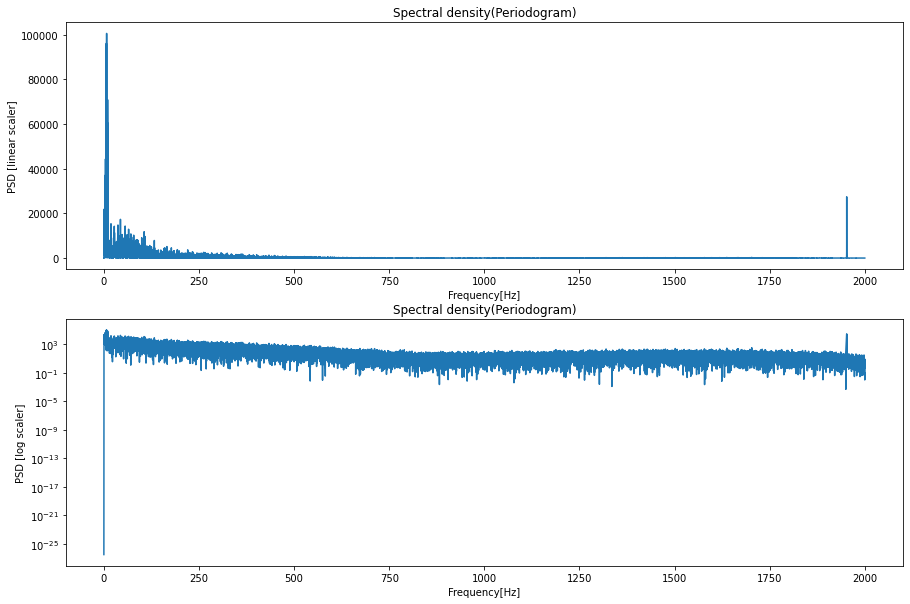

In [11]:
fig, ax = plt.subplots(2,1,figsize=(15,10))

f_wel, Pxx_den_wel = signal.welch(sig, fs)
f_per, Pxx_den_per = signal.periodogram(sig, fs)

ax[0].set_title('Spectral density(Periodogram)')
ax[0].set_xlabel('Frequency[Hz]')
ax[0].set_ylabel('PSD [linear scaler]')
ax[0].plot(f_per, Pxx_den_per)

ax[1].set_title('Spectral density(Periodogram)')
ax[1].set_xlabel('Frequency[Hz]')
ax[1].set_ylabel('PSD [log scaler]')
ax[1].semilogy(f_per, Pxx_den_per);

O gráfico na escala logaritimica mostra a que existe grande quantidade de informação de baixa energia para um grande intervalo de frequências.

# 2. Construindo um filtro
Para encontrar as frequências do sinal EMG foi feita uma pesquisa na literatura. Como mostrado em [1] esse sinal varia de 0Hz até 400Hz porém o mesmo recomenda que para o corte de alta frequência seja feito de 400Hz-450Hz para que a amplitude da energia do ruído dos componentes seja maior que a do Sinal. O autor traz uma discussão de diversos grupos de neurofisiologia sobre a baixa frequência de corte, estes trazem recomendações variando de 5Hz até 28Hz, porém, segundo [2] a banda passante que concentra 80% da energia do sinal EMG é de 20Hz-450Hz e essa será a faixa utilizada neste trabalho, outros trabalhos recomendam uma banda passante de 20Hz até 500HZ [4] [5]. 

## 2.1 Design do Filtro
O Design de filtro utilizado será o de Butterwoth, esse design ja possui ampla implementação e uma [documentação](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) robusta, além disso como o projeto não exige uma fase linear, o filtro de Butterworth possui uma reposta ao impulso caracterizada como IIR (Infinite Impulse Response). Para criar o filtro utilizando Butterworth são nescessários alguns parâmetros, são eles:

-  Frequência de Amostragem. (para cálculo das frequências de corte)
-  Frequências de corte.
-  Ordem do Filtro, do polinômio carecterístico.

De forma geral pode se pensar nesse filtro como uma função polinomial que aproxima seu comportamento . Utilizando as frequências de corte acima temos o seguinte filtro passa faixa (seção 2.1.2):

In [12]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, band_type, order=5,analog=False):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high],analog=analog,btype=band_type)
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, band_type, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order,band_type=band_type)
    y = lfilter(b, a, data)
    return y

In [13]:
nyq = 0.5 * fs
def filter_design(low_cut,high_cut,fs, band_type):
  fig, axs = plt.subplots(1,5,figsize=(25,5))
  fig.suptitle('Butterworth digital filter frequency response')
  for i in range(0,5):
    b, a = butter_bandpass(low_cut, high_cut, fs, order=i+1,analog=False, band_type=band_type)
    w, h = signal.freqz(b, a)
    axs[i].semilogx(w, 20 * np.log10(abs(h)))
    axs[i].set_title(f'polynomials Order: {i+1}')
    axs[i].margins(0, 0.1)
    axs[i].grid(which='both', axis='both')
    axs[i].axvline((np.pi*low_cut)/nyq, color='green') 
    axs[i].axvline((np.pi*high_cut)/nyq, color='green');

  for ax in axs.flat:
      ax.set(xlabel='Frequency [radians / second]', ylabel='Amplitude [dB]')

  # Hide x labels and tick labels for top plots and y ticks for right plots.
  for ax in axs.flat:
      ax.label_outer()


### 2.1.2 Filtro Passa Faixa (20Hz-450Hz)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


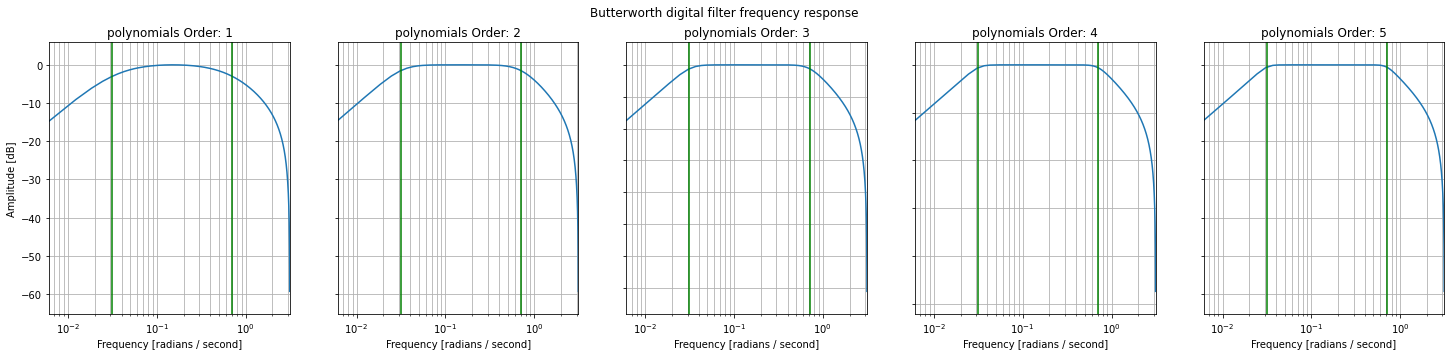

In [14]:
filter_design(20,450,fs,'band')

Quanto maior a ordem do polinômio de Butterwoth mais quadratica (Flat) será a resposta, se aproximando de um filtro ideal ao custo de atrasar o sinal filtrado em relação ao sinal original como será demostrando a seguir (seção 2.2). 

### 2.1.2 Filtro Rejeita Faixa
Esse Filtro será utilizado para extrair a interferência da rede elétrica (55Hz-62Hz), usando o mesmo Design apresentado.

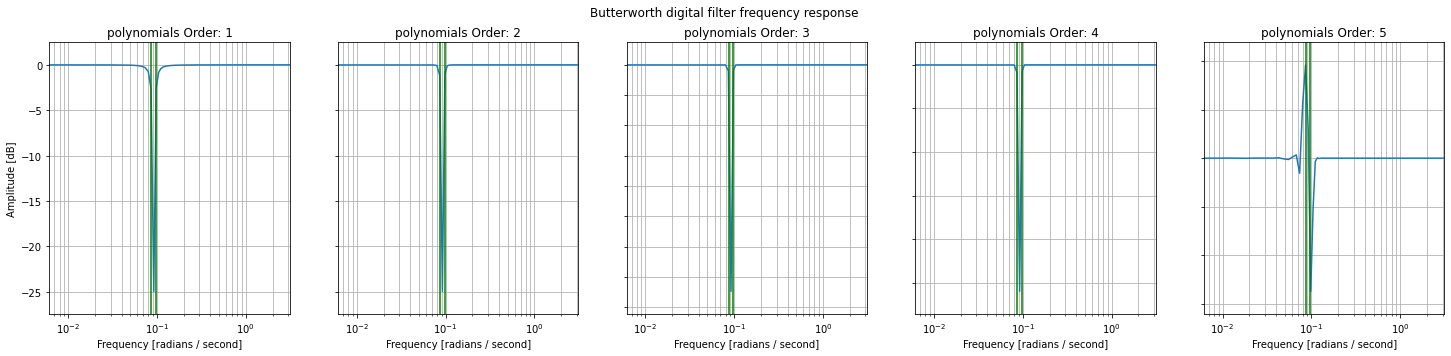

In [15]:
filter_design(55,62,fs,'bandstop')

Como é possível análisar para polinomios a partir da 5° ordem o filtro apresenta um comportamento indesejado. 

## 2.2 Aplicando os Filtros
Aplicando os filtros variando a ordem.

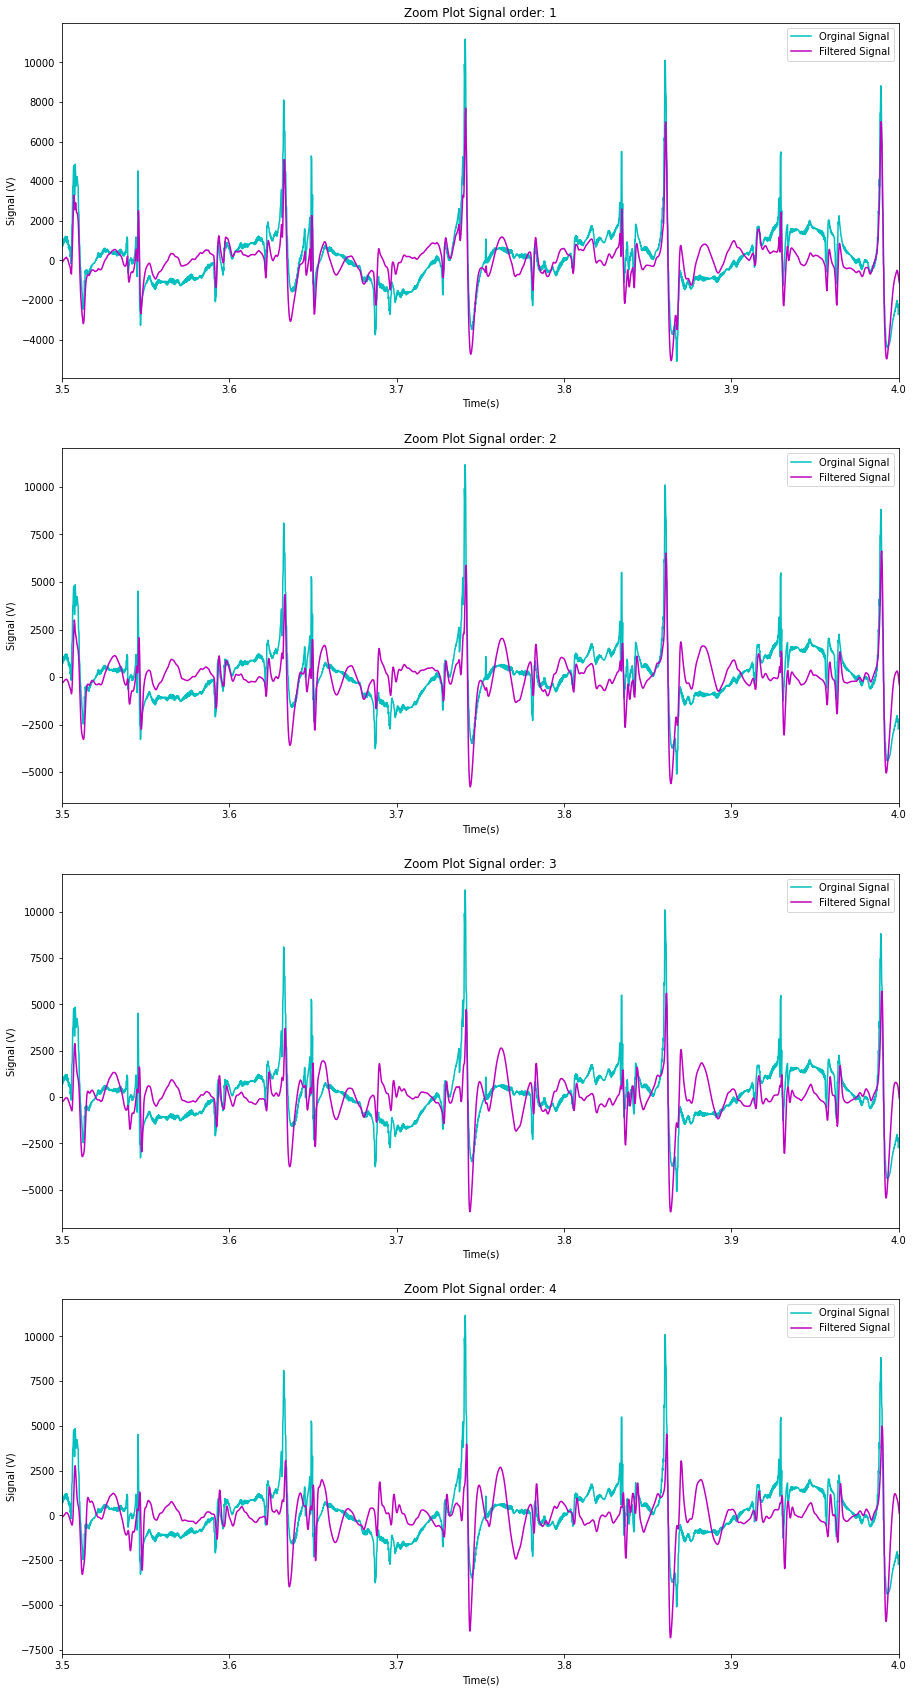

In [16]:
fig, axs = plt.subplots(4,1,figsize=(15,30))


for i in range(0,4):
  #Filtro da rede elétrica
  filter_sig_ele = butter_bandpass_filter(sig, 55, 62, fs, order=i+1, band_type='bandstop')
  #Filtro do EMG
  filter_sig = butter_bandpass_filter(filter_sig_ele, 20, 450, fs, order=i+1, band_type='band')
  
  axs[i].set_title(f'Zoom Plot Signal order: {i+1}')
  axs[i].set_xlabel('Time(s)')
  axs[i].set_ylabel('Signal (V)')
  axs[i].margins(x=0.025)
  axs[i].set_xlim([3.5,4])
  axs[i].plot(t, sig, color='c')
  axs[i].plot(t,filter_sig,color='m')
  axs[i].legend(["Orginal Signal", "Filtered Signal"])

É possível notar um pequeno atraso do sinal filtrado em relação ao original a medida que ordem aumenta.

# 3.0 Análise de resultados


In [17]:
def zoom_origial_filtered_signal(t,sig,filter_sig,title='eletrica'):
  fig, ax = plt.subplots(2,1,figsize=(20,10))

  ax[0].set_title(f'Plot Signal {title}')
  ax[0].set_xlabel('t(s)')
  ax[0].set_ylabel('Sig(V)')
  ax[0].plot(t, sig, color='c')
  ax[0].plot(t,filter_sig,color='m')
  ax[0].legend(["Orginal Signal", "Filtered Signal"])



  ax[1].set_title(f'Zoom Plot Signal {title}')
  ax[1].set_xlabel('Time(s)')
  ax[1].set_ylabel('Signal (V)')
  ax[1].margins(x=0.025)
  ax[1].set_xlim([3.5,4])
  ax[1].plot(t, sig, color='c')
  ax[1].plot(t,filter_sig,color='m')
  ax[1].legend(["Orginal Signal", "Filtered Signal"])

def filter_original_sig(t,sig,filter_sig):
  fig, ax = plt.subplots(2,1,figsize=(20,10))

  ax[0].set_title('Plot of Original Signal')
  ax[0].set_xlabel('t(s)')
  ax[0].set_ylabel('Sig(V)')
  ax[0].plot(t, sig, color='c')


  ax[1].set_title('Plot of Filtered Signal')
  ax[1].set_xlabel('Time(s)')
  ax[1].set_ylabel('Signal (V)')
  ax[1].plot(t,filter_sig,color='m')

  plt.show()


### Plotando os resultados Finais
A partir dos resultados obtidos na seção 2, será utiizado um filtro de terceira ordem.

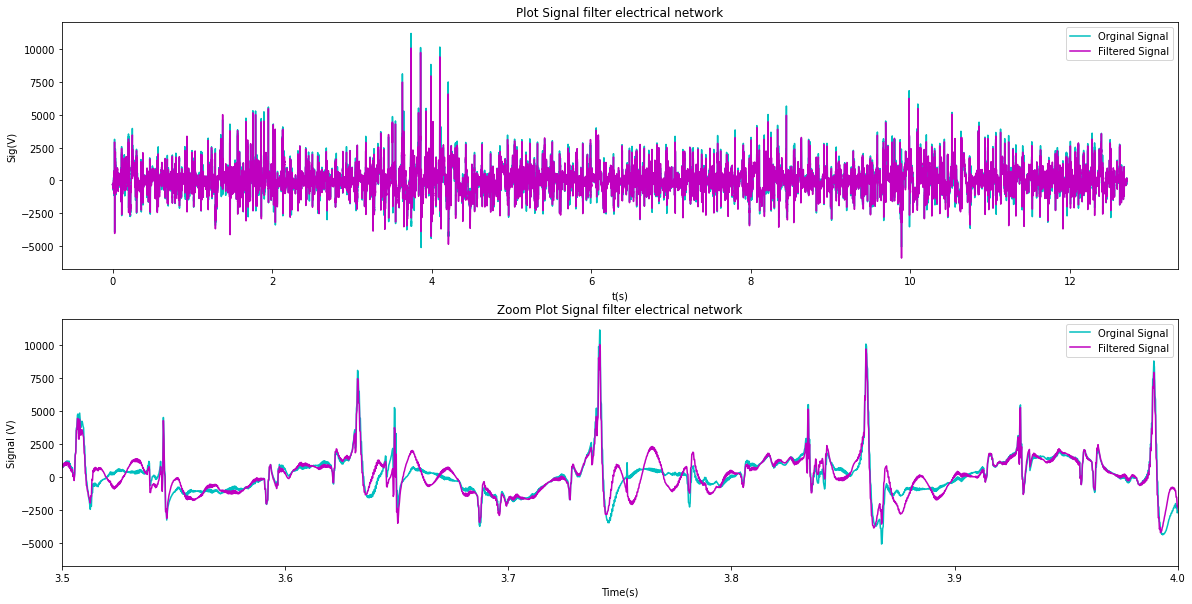

In [18]:
filter_sig_ele = butter_bandpass_filter(sig, 55,62, fs, order=3, band_type='bandstop')
zoom_origial_filtered_signal(t,sig,filter_sig_ele,title='filter electrical network')

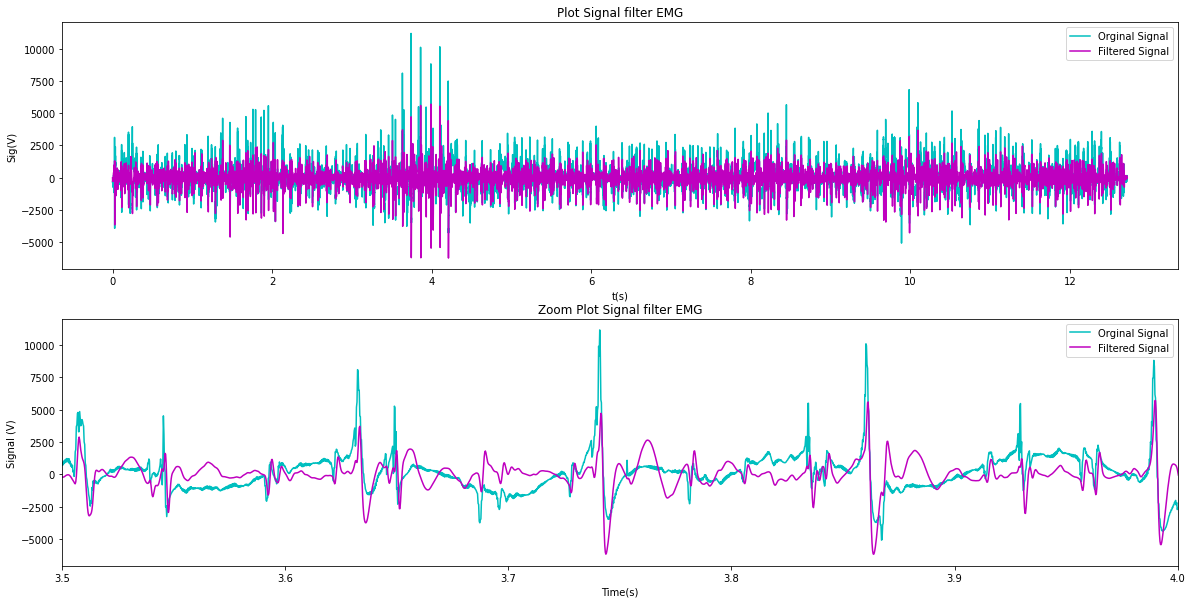

In [19]:
filter_sig = butter_bandpass_filter(filter_sig_ele, 20, 450, fs, order=3,band_type='band')
zoom_origial_filtered_signal(t,sig,filter_sig,title='filter EMG')

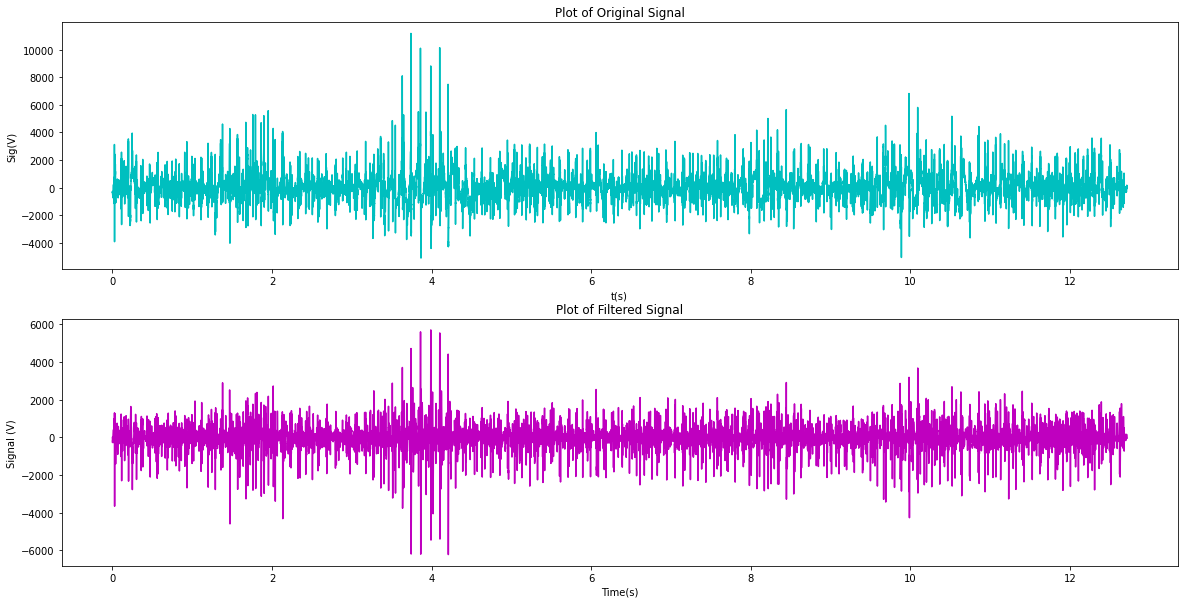

In [20]:
filter_original_sig(t,sig,filter_sig)  

A filtragem mostrou bons resultados nesta faixa de frequência, grande parte do ruído foi removido além disso, a forma e as informações do sinal foram preservadas. O sinal filtrado possui menores amplitudes em comparação ao sinal original mostrando que os picos de amplitude do sinal original advinham de ruído.

# Referências:

[1] DE LUCA, Carlo J. et al. Filtering the surface EMG signal: Movement artifact and baseline noise contamination. **Journal of biomechanics**, v. 43, n. 8, p. 1573-1579, 2010.

[2] ALTIMARI, Leandro Ricardo et al. Influence of different strategies of treatment muscle contraction and relaxation phases on EMG signal processing and analysis during cyclic exercise. **Computational intelligence in electromyography analysis—a perspective on current applications and future challenges**, p. 97-116, 2012.

[3] LATHI, B. P; PARMA, Gustavo Guimarães. **Sinais e sistemas lineares**. 2. ed. Porto Alegre: Bookman, 2007. 856 p. ISBN: 9788560031139.

[4] Jamaluddin FN, Ahmad SA, Noor SB, Hassan WZ, Yaakob A, Adam Y, Ali SH. **Amplitude and frequency changes in surface EMG of biceps femoris during five days Bruce Protocol treadmill test**. Annu Int Conf IEEE Eng Med Biol Soc. 2015;2015:6219-22. doi: 10.1109/EMBC.2015.7319813. PMID: 26737713.

[5] ALLISON, G. T.; FUJIWARA, T. The relationship between EMG median frequency and low frequency band amplitude changes at different levels of muscle capacity. **Clinical Biomechanics**, v. 17, n. 6, p. 464-469, 2002.